In [1]:
import os
EXAMPLE_DIR = os.getcwd()
os.chdir(os.path.join('..', '..'))
PROJECT_DIR = os.getcwd()
print('EXAMPLE_DIR: ', EXAMPLE_DIR)
print('PROJECT_DIR: ', PROJECT_DIR)

EXAMPLE_DIR:  /Users/kandai/Documents/projects/research/regret_synthesis_toolbox/examples/FishAndShipwreckAvoidAgent
PROJECT_DIR:  /Users/kandai/Documents/projects/research/regret_synthesis_toolbox


In [2]:
%load_ext autoreload
%autoreload 2
import gym
from IPython.display import Video, display

import sys
import time
import numpy as np
from pathlib import Path

sys.path.append(os.path.join(PROJECT_DIR, 'src'))
from src.graph import Graph
from src.graph import graph_factory
from src.config import ROOT_PATH
from src.strategy_synthesis import MultiObjectiveSolver
from src.simulation.simulator import Simulator

sys.path.append(os.path.join(PROJECT_DIR, 'wombats'))
from wombats.systems.minigrid import GYM_MONITOR_LOG_DIR_NAME
from wombats.systems.minigrid import DynamicMinigrid2PGameWrapper, MultiAgentMiniGridEnv

DIR = EXAMPLE_DIR
Graph.automata_data_dir = DIR

In [3]:
debug = True

env_id = 'MiniGrid-FishAndShipwreckAvoidAgent-v0'
pdfa_config_yaml="config/PDFA_Fish_and_Shipwreck"
player_steps = {'sys': [1, 3], 'env': [1]}

load_game_from_file = False
plot_minigrid = False
plot_pdfa = True
plot_product = False
finite = True
view = True
save_flag = True
format = 'png'

stochastic = False
adversarial = True
plot_strategies=False
plot_graph_with_strategy = False
plot_graph_with_pareto = False
plot_pareto = True
speedup = True

env_filename = os.path.join(DIR, 'plots', 'gym_env.png')
Path(os.path.split(env_filename)[0]).mkdir(parents=True, exist_ok=True)
env_dpi = 300

/Users/kandai/Documents/projects/research/regret_synthesis_toolbox/plots/pdfa.png


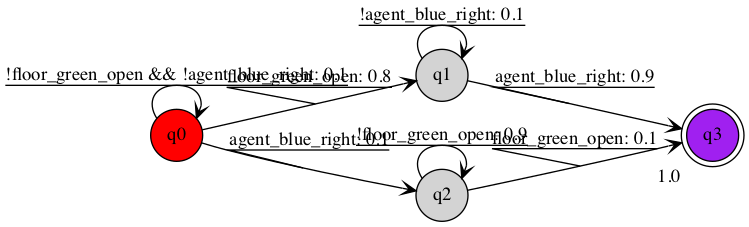

In [4]:
# PDFA
pdfa = graph_factory.get(
    'PDFA',
    graph_name="pdfa",
    config_yaml=pdfa_config_yaml,
    save_flag=save_flag,
    plot=plot_pdfa,
    view=view,
    format=format)

/Users/kandai/.pyenv/versions/anaconda3-5.3.0/envs/adam_can_play_any_strategy/lib/python3.8/site-packages/gym/wrappers/monitor.py:31: UserWarning: The Monitor wrapper is being deprecated in favor of gym.wrappers.RecordVideo and gym.wrappers.RecordEpisodeStatistics (see https://github.com/openai/gym/issues/2297)
  warnings.warn(


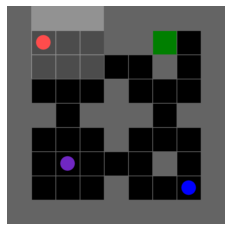

In [5]:

# OpenAI Minigrid Env
env = gym.make(env_id)
env = DynamicMinigrid2PGameWrapper(
        env,
        player_steps=player_steps,
        monitor_log_location=os.path.join(DIR, GYM_MONITOR_LOG_DIR_NAME))
env.reset()
env.render_notebook(env_filename, env_dpi)

In [6]:
file_name = env_id + 'Game'
filepath = os.path.join(DIR, 'config', file_name)
config_yaml = os.path.relpath(filepath, ROOT_PATH)

# Game Construction
start = time.time()
two_player_graph = graph_factory.get('TwoPlayerGraph',
                            graph_name='TwoPlayerGame',
                            config_yaml=config_yaml,
                            from_file=load_game_from_file,
                            minigrid=env,
                            save_flag=save_flag,
                            plot=plot_minigrid,
                            view=view,
                            format=format)
end = time.time()

In [7]:
# Product Game Construction
file_name = env_id + 'ProductAutomaton'
# config_yaml = os.path.join(DIR, 'config', file_name)
config_yaml = None

start = time.time()
game = graph_factory.get('ProductGraph',
    graph_name='ProductAutomaton',
    config_yaml=config_yaml,
    trans_sys=two_player_graph,
    automaton=pdfa,
    save_flag=True,
    prune=False,
    debug=False,
    absorbing=True,
    finite=finite,
    plot=plot_product,
    integrate_accepting=True,
    view=view,
    format=format)
end = time.time()
print(f'Product Construction took {end-start:.2f} seconds')

Product Construction took 9.03 seconds


15626 nodes and 151747 edges
1th Iteration took 31.89 seconds
2th Iteration took 48.35 seconds
3th Iteration took 65.08 seconds
4th Iteration took 78.63 seconds
5th Iteration took 95.44 seconds
6th Iteration took 133.39 seconds
7th Iteration took 150.83 seconds
8th Iteration took 144.21 seconds
9th Iteration took 206.51 seconds
10th Iteration took 197.59 seconds
11th Iteration took 180.55 seconds
12th Iteration took 220.91 seconds
13th Iteration took 212.72 seconds
14th Iteration took 228.17 seconds
15th Iteration took 148.11 seconds
16th Iteration took 149.17 seconds
Pareto Points Computation took 2304.04 seconds


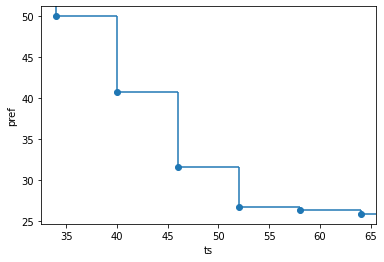

(array([[46.        , 31.51401394],
        [40.        , 40.72435432],
        [58.        , 26.27668066],
        [34.        , 49.93469469],
        [52.        , 26.69812273],
        [64.        , 25.8552386 ]]),
 {(46.0,
   31.514013943789994): <src.prism.strategy.DeterministicStrategy at 0x7fa02c4bc850>,
  (40.0,
   40.72435431576617): <src.prism.strategy.DeterministicStrategy at 0x7fa00a55cbe0>,
  (58.0,
   26.27668066385494): <src.prism.strategy.DeterministicStrategy at 0x7fa00a55c6d0>,
  (34.0,
   49.93469468774234): <src.prism.strategy.DeterministicStrategy at 0x7fa00a55cd90>,
  (52.0,
   26.698122726486247): <src.prism.strategy.DeterministicStrategy at 0x7fa009e99520>,
  (64.0,
   25.855238601223636): <src.prism.strategy.DeterministicStrategy at 0x7fa00b28d5b0>})

In [8]:
solver = MultiObjectiveSolver(game,
                            epsilon=1e-5,
                            max_iteration=300,
                            stochastic=stochastic,
                            adversarial=adversarial)
solver.solve(plot_strategies=plot_strategies,
                plot_graph_with_strategy=plot_graph_with_strategy,
                plot_graph_with_pareto=plot_graph_with_pareto,
                plot_pareto=plot_pareto,
                speedup=speedup,
                debug=debug,
                view=view,
                format=format)

In [9]:
iterations = 100
iterations = 1

for pp in solver.get_pareto_points():
        strategy = solver.get_a_strategy_for(pp)

        print('-'*100)
        print(f"Evaluate for a pareto point {pp}")
        print('-'*100)

        sim = Simulator(env, game)
        sim.run(iterations=iterations,
                sys_strategy=strategy,
                render=False,
                record_video=iterations<=15)
        sim.get_stats()
        # sim.plot_grid()

----------------------------------------------------------------------------------------------------
Evaluate for a pareto point [46.         31.51401394]
----------------------------------------------------------------------------------------------------
Maximum Costs [46.         27.11956479]
Observation {('agent_blue_right', 'floor_green_open'): 1}
----------------------------------------------------------------------------------------------------
Evaluate for a pareto point [40.         40.72435432]
----------------------------------------------------------------------------------------------------
Maximum Costs [39.         40.51363328]
Observation {('agent_purple_right', 'agent_purple_right', 'agent_blue_right', 'agent_blue_right', 'floor_green_open'): 1}
----------------------------------------------------------------------------------------------------
Evaluate for a pareto point [58.         26.27668066]
-------------------------------------------------------------------------

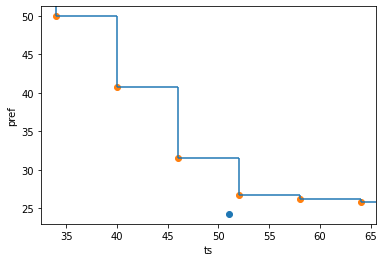

In [10]:
import matplotlib.pyplot as plt
costs = []
for result in sim._results:
    costs.append(result['Cost'])

costs = np.array(costs)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(costs[:, 0], costs[:, 1])

solver.plot_pareto_front(ax)

# Evaluation

In [11]:
# TODO: FIX THIS SHIT

player = 'sys'
SYS_ACTIONS = []
for multiactions in env.player_actions[player]:
    action_strings = []
    for agent, actions in zip(env.unwrapped.agents, multiactions):
        action_string = []
        for action in actions:
            if action is None or np.isnan(action):
                continue
            a_str = agent.ACTION_ENUM_TO_STR[action]
            action_string.append(a_str)
        action_strings.append(tuple(action_string))
    action_strs = action_strings[0] if player == 'sys' else action_strings[1:]
    SYS_ACTIONS.append(tuple(action_strs))

player = 'env'
ENV_ACTIONS = []
for multiactions in env.player_actions[player]:
    action_strings = []
    for agent, actions in zip(env.unwrapped.agents, multiactions):
        action_string = []
        for action in actions:
            if action is None or np.isnan(action):
                continue
            a_str = agent.ACTION_ENUM_TO_STR[action]
            action_string.append(a_str)
        action_strings.append(tuple(action_string))
    action_strs = action_strings[0] if player == 'sys' else action_strings[1:]
    ENV_ACTIONS.append(tuple(action_strs))

print(SYS_ACTIONS)
print(ENV_ACTIONS)

[('north',), ('south',), ('east',), ('west',), ('north', 'north', 'north'), ('north', 'north', 'south'), ('north', 'north', 'east'), ('north', 'north', 'west'), ('north', 'south', 'north'), ('north', 'south', 'south'), ('north', 'south', 'east'), ('north', 'south', 'west'), ('north', 'east', 'north'), ('north', 'east', 'south'), ('north', 'east', 'east'), ('north', 'east', 'west'), ('north', 'west', 'north'), ('north', 'west', 'south'), ('north', 'west', 'east'), ('north', 'west', 'west'), ('south', 'north', 'north'), ('south', 'north', 'south'), ('south', 'north', 'east'), ('south', 'north', 'west'), ('south', 'south', 'north'), ('south', 'south', 'south'), ('south', 'south', 'east'), ('south', 'south', 'west'), ('south', 'east', 'north'), ('south', 'east', 'south'), ('south', 'east', 'east'), ('south', 'east', 'west'), ('south', 'west', 'north'), ('south', 'west', 'south'), ('south', 'west', 'east'), ('south', 'west', 'west'), ('east', 'north', 'north'), ('east', 'north', 'south'), (

In [12]:
pp = solver.get_pareto_points()[0]
strategy = solver.get_a_strategy_for(pp)

# Goes into Water 
sys_actions = [
    SYS_ACTIONS[2], 
    SYS_ACTIONS[2], 
    SYS_ACTIONS[2], 
    SYS_ACTIONS[0], 
    SYS_ACTIONS[2], 
    SYS_ACTIONS[2],
    SYS_ACTIONS[1], 
    SYS_ACTIONS[2], 
    SYS_ACTIONS[2],
    SYS_ACTIONS[0],
    SYS_ACTIONS[0],
    SYS_ACTIONS[0],
    SYS_ACTIONS[2],
    SYS_ACTIONS[1],
    SYS_ACTIONS[1],
    SYS_ACTIONS[1],
    ]

sim = Simulator(env, game)
sim.run_turn_based_game(
    sys_actions=sys_actions,
    # env_actions=env_actions,
    render=False,
    record_video=True)
sim.get_stats()

Exception: No more actions to take

In [ ]:
env_actions = [
    ENV_ACTIONS[3], 
    ENV_ACTIONS[1], 
    ENV_ACTIONS[3], 
    ENV_ACTIONS[2], 
    ENV_ACTIONS[2], 
    ENV_ACTIONS[2],
    ENV_ACTIONS[2],
    ENV_ACTIONS[2],
    ENV_ACTIONS[1],
    ENV_ACTIONS[1],
    ENV_ACTIONS[1],
    ENV_ACTIONS[1],
    ENV_ACTIONS[1],
    ENV_ACTIONS[1],
    ENV_ACTIONS[1],
    ENV_ACTIONS[1],
    ]

sim = Simulator(env, game)
sim.run_turn_based_game(
    sys_strategy=strategy,
    env_actions=env_actions,
    render=False,
    record_video=True)
sim.get_stats()

Maximum Costs [54.          4.35169905]
Observation {('floor_green_open',): 1}
